
    # Análise de Missing Values

    Este notebook investiga quais colunas do conjunto de dados estão gerando um grande número de valores ausentes (`NaN`), levando à remoção de muitas linhas durante o treinamento. Ele utiliza as funções de pré‑processamento definidas em `src/data/prepare_data.py` para carregar e achatar os arquivos JSON (``applicants.json``, ``prospects.json`` e ``vagas.json``).

    Ajuste o caminho `data_dir` abaixo para o diretório que contém seus arquivos de dados brutos.
    

In [5]:

import sys
from pathlib import Path
import pandas as pd

# Adiciona o diretório raiz do projeto ao sys.path para permitir imports
sys.path.append(str(Path('../').resolve()))  # ajuste se necessário

from src.data.prepare_data import build_dataset

# Diretório contendo applicants.json, prospects.json e vagas.json
# Ajuste conforme sua estrutura de pastas
DATA_DIR = Path('../data/raw')
print(DATA_DIR)

# Carrega o dataset
X, y, meta = build_dataset(DATA_DIR)

# Remove colunas de ID
id_cols = meta['id_cols']
X_features = X.drop(columns=id_cols)

print(f"Total de linhas antes de dropar NaNs: {len(X_features)}")
# Conta NaNs por coluna
missing_counts = X_features.isna().sum().sort_values(ascending=False)
missing_counts
    

../data/raw
Total de linhas antes de dropar NaNs: 53759


nivel_ingles            42349
nivel_academico         41810
remuneracao_num         38597
tempo_processamento      3913
tipo_contratacao         1856
cidade                    227
estado                     67
analista_responsavel       24
sim_tfidf                   0
overlap_kw                  0
cand_missing_ratio          0
cand_text_len               0
vaga_text_len               0
recrutador                  0
dtype: int64

In [9]:
X_features.nivel_academico.value_counts()

nivel_academico
Ensino Superior Completo         5319
Pós Graduação Completo           3044
Ensino Superior Cursando         1256
Ensino Superior Incompleto        574
Pós Graduação Cursando            494
Pós Graduação Incompleto          301
Mestrado Completo                 284
Ensino Técnico Completo           186
Ensino Médio Completo             172
Mestrado Incompleto               117
Mestrado Cursando                  51
Ensino Fundamental Completo        47
Ensino Técnico Cursando            22
Doutorado Incompleto               21
Doutorado Cursando                 18
Doutorado Completo                 14
Ensino Técnico Incompleto           8
Ensino Médio Incompleto             6
Ensino Fundamental Incompleto       6
Ensino Fundamental Cursando         6
Ensino Médio Cursando               3
Name: count, dtype: int64

Linhas sem nenhum NaN: 7313
Proporção de linhas retidas: 0.1360


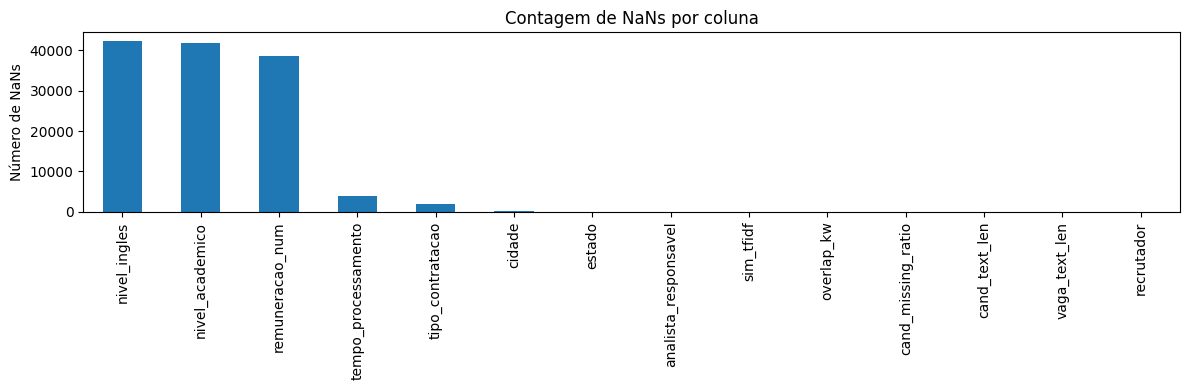

In [6]:

# Calcula a proporção de valores ausentes por coluna
missing_ratio = (missing_counts / len(X_features)).sort_values(ascending=False)

# Exibe as 10 colunas com mais NaNs
missing_ratio.head(10)

# Verifica quantas linhas seriam perdidas se removermos NaNs de todas as features de uma vez
mask_no_nan = ~X_features.isna().any(axis=1)
print(f"Linhas sem nenhum NaN: {mask_no_nan.sum()}")
print(f"Proporção de linhas retidas: {mask_no_nan.sum() / len(X_features):.4f}")

# Visualização opcional: gráfico de barras
try:
    import matplotlib.pyplot as plt
    %matplotlib inline
    missing_counts.plot(kind='bar', figsize=(12, 4), title='Contagem de NaNs por coluna')
    plt.ylabel('Número de NaNs')
    plt.tight_layout()
except Exception as e:
    print('Falha ao gerar gráfico:', e)
    